In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

from salishsea_tools.nc_tools import scDataset

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = functions_transport_W.get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepwn, tmaskn, mbathyn, e1tn, e2tn = functions_transport_W.get_variables_planes(dirname, filename)

In [3]:
surface_mask, axis_thalweg, ind_break, ind_head, ind_shelf, ind_half, area_k, area_k0 = functions_transport_W.get_indices_V(gdepw, tmask, tmaskn, mbathy, mbathyn, e1t, e2t)

In [4]:
filepattern = "1_MCKNZ_1h_20170101_20170120_*"
vovecrtz = functions_transport_W.get_variables_fluxes(dirname, filepattern, surface_mask)

In [5]:
def plot_canyon(variable, N, deps, vmin, vmax, cmap, ttl):
    cmap = plt.get_cmap(cmap)
    cmap.set_bad('white')
    fig, ax = plt.subplots(1, N, figsize=(20, 7), sharey=True)
    
    for n, dep in zip(np.arange(N), deps):
        var = variable[dep, :, :]
        p = ax[n].pcolormesh(var, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.setp(ax[n].get_xticklabels(), visible=False)
        ax[n].set_title(str(dep) + ' = ' + str(int(gdepwn[dep])) + ' m', fontsize=14)
        ax[n].set_xlim([0, vovecrtz.shape[-1]])
        ax[n].set_ylim([0, vovecrtz.shape[-2]])
        ax[n].set_xlabel('x inds', fontsize=14)
        if n == N-1:
            fig.colorbar(p, ax=ax[n])
    ax[0].set_ylabel('y inds', fontsize=14)
    fig.suptitle(ttl, fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.90])
    return fig

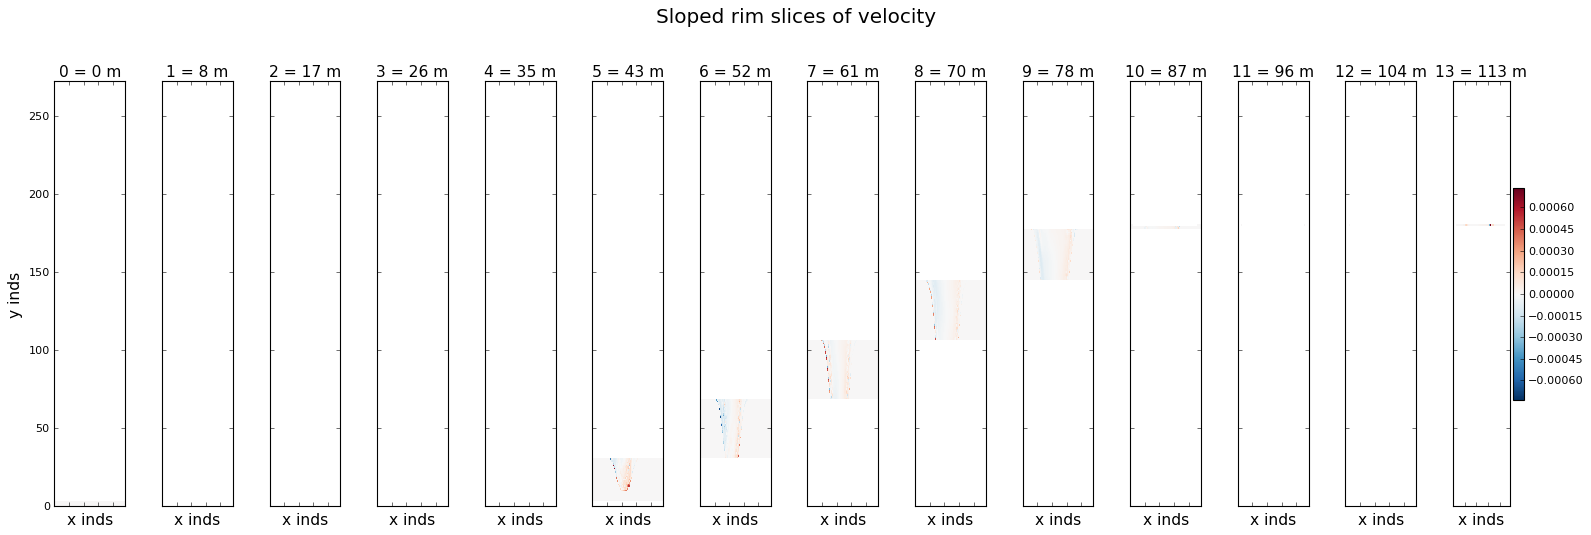

In [6]:
N = 14
deps = np.arange(0, 0+N)
time_ind = 120
ttl = 'Sloped rim slices of velocity'

vm = max([abs(vovecrtz[time_ind, ...].min()), abs(vovecrtz[time_ind, ...].max())])
vmin = -1*vm; vmax=vm

fig = plot_canyon(vovecrtz[time_ind, ...], N, deps, vmin, vmax, cm.RdBu_r, ttl)

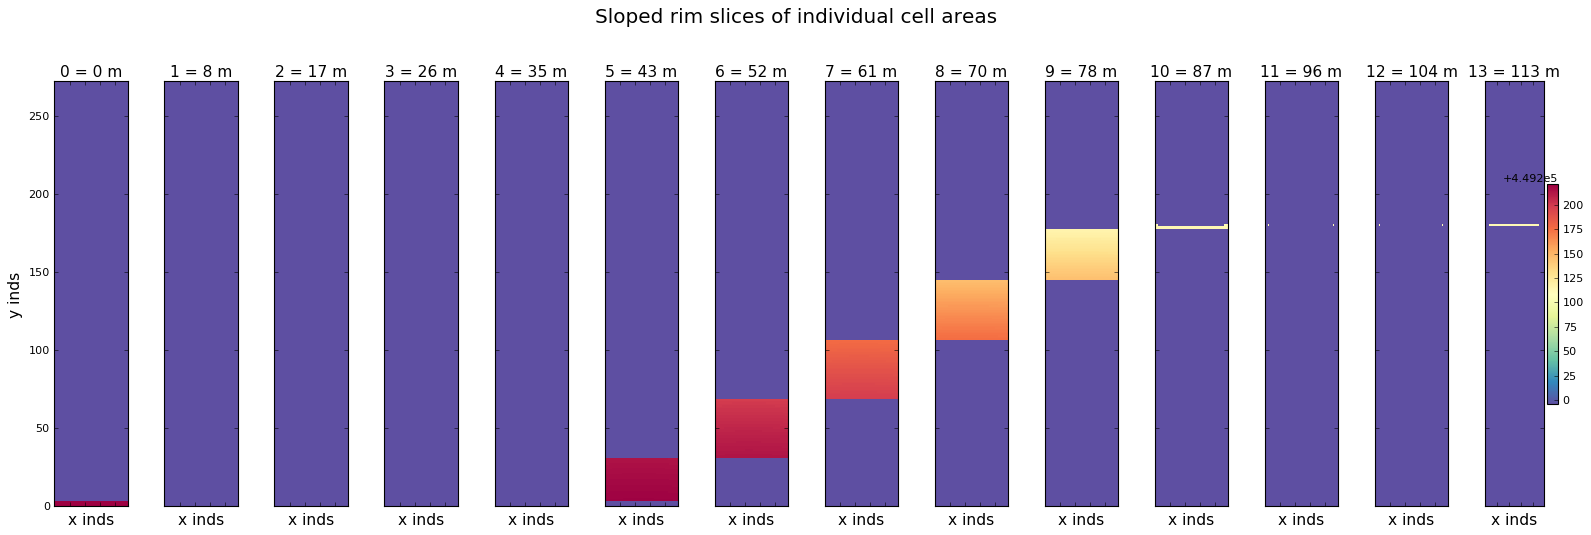

In [7]:
vmin = area_k0.min()
vmax = area_k0.max()

N = 14
deps = np.arange(0, 0+N)
time_ind = 120
ttl = 'Sloped rim slices of individual cell areas'
fig = plot_canyon(area_k, N, deps, vmin, vmax, cm.Spectral_r, ttl)

In [8]:
vovecrtz.shape, area_k.shape

((480, 80, 272, 242), (80, 272, 242))

In [9]:
def calculate_flux_W(time_ind, velocity_surface, area_surface):
    
    Q_surface = velocity_surface[time_ind, :, :, :] * area_surface
    
    return Q_surface

In [10]:
time_ind = 120

Q_surface = calculate_flux_W(time_ind, vovecrtz, area_k)

Q_surface.shape

(80, 272, 242)

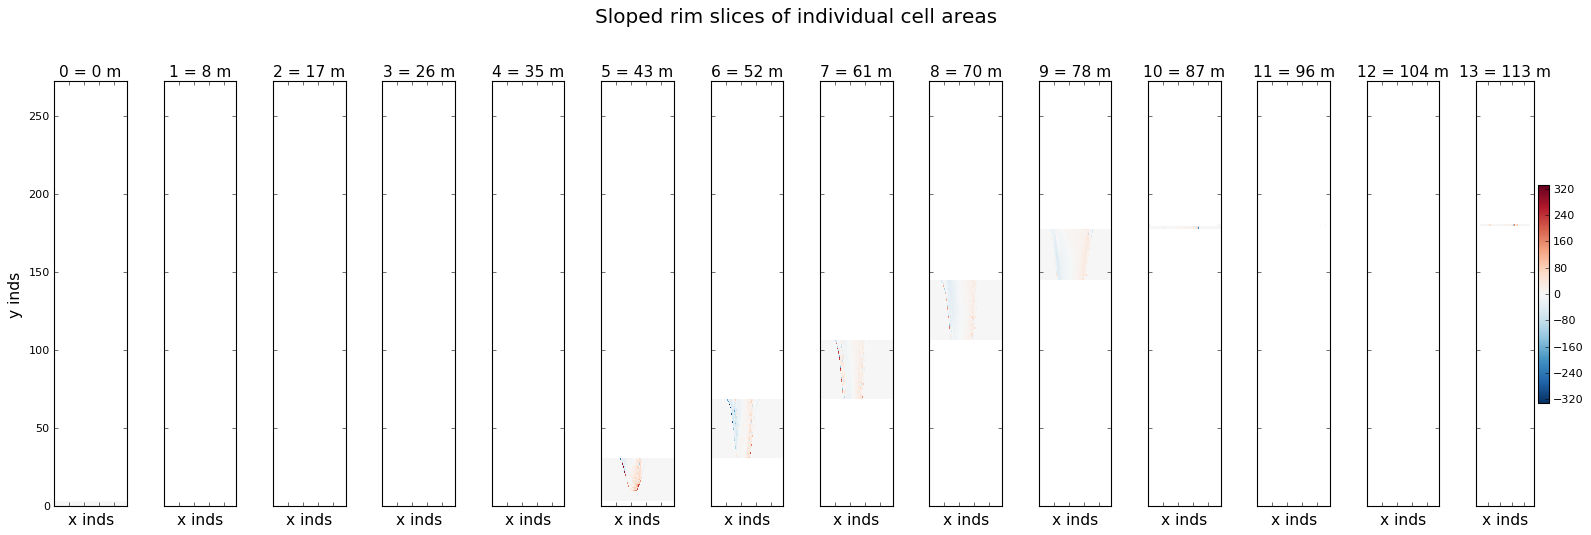

In [19]:
vm = max([abs(Q_surface.min()), abs(Q_surface.max())])
vmin = -1*vm; vmax=vm

N = 14
deps = np.arange(0, 0+N)
time_ind = 120
ttl = 'Sloped rim slices of individual cell areas'
fig = plot_canyon(Q_surface, N, deps, vmin, vmax, cm.RdBu_r, ttl)

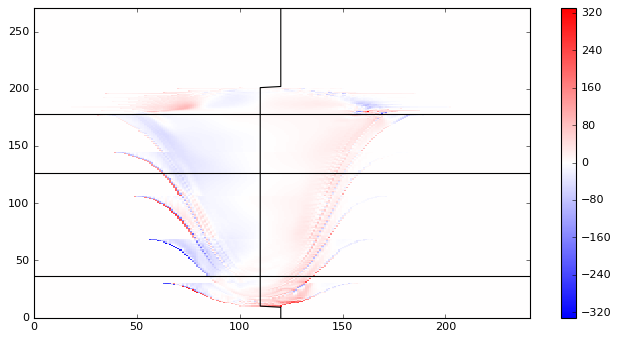

In [33]:
xs = np.arange(Q_surface.shape[-1])
ys = np.arange(Q_surface.shape[-2])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for dep in range(vovecrtz.shape[-3]):
    p = ax.pcolormesh(Q_surface[dep, :, :], cmap=cm.bwr, vmin=-1*vm, vmax=vm)
ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])
fig.colorbar(p, ax=ax)

for ind in zip([ind_head, ind_break, ind_half]):
    ax.axhline(ind, c = 'k')
ax.plot(axis_thalweg, ys, c = 'k')

In [11]:
def calculate_flux_W_evolution(velocity_surface, area_surface):
    
    Q_surface_all = np.zeros_like(velocity_surface)
    for time_ind in range(Q_surface_all.shape[0]):
        Q_surface_all[time_ind, :, :, :] = calculate_flux_W(time_ind, velocity_surface, area_surface)
        
    return Q_surface_all

In [12]:
Q_surface_all = calculate_flux_W_evolution(vovecrtz, area_k)

Q_surface_all.shape

(480, 80, 272, 242)

In [ ]:
var_headW = variable[..., : ind_shelf, ind_rimW : ind_axis]
var_headE = variable[..., : ind_shelf, ind_axis : ind_rimE]

var_mouthW
var_mouthE